In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import numpy as np

### Ablation 1: Varying coarseness of observation

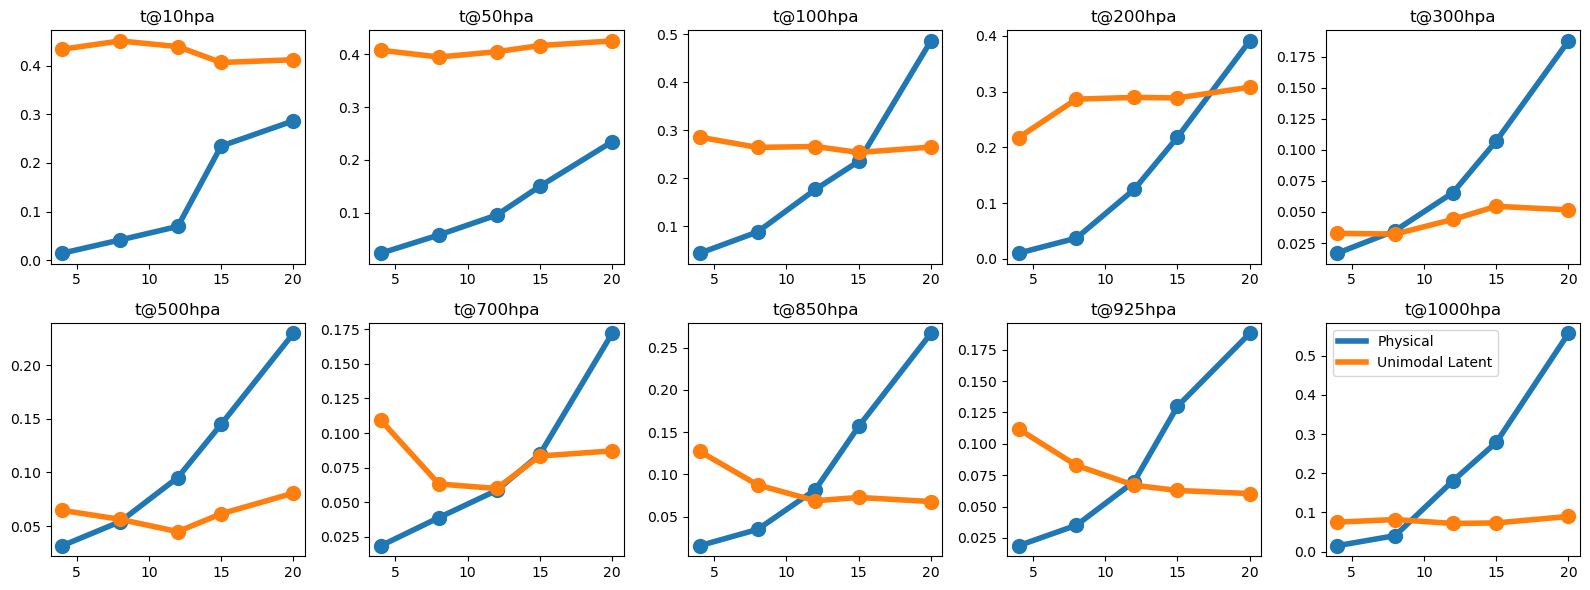

In [3]:
## CONCLUSION: Diffusion in the latent space tends to be more stable than that in the physical space 
## with more perturbation in the observation domain (i.e., increasing coarseness)

model_names = ['sda_0', 'lsda_0']
model_labels = ['Physical', 'Unimodal Latent']
params = [10, 50, 100, 200, 300, 500, 700, 850, 925, 1000]
coarsening_factors = [4, 8, 12, 15, 20]
n_params = 10
sigma = 0.1

f, ax = plt.subplots(2, 5, figsize=(16, 6)) 

for param_idx in range(n_params):
    row = param_idx // 5 
    col = param_idx % 5  
    for model_idx, model_name in enumerate(model_names):
        df = pd.read_csv(f'docs/{model_name}/wasserstein_sigma={sigma}.csv')
        line, = ax[row, col].plot(coarsening_factors, df.iloc[param_idx].values, label=f'{model_labels[model_idx]}', linewidth=4)
        ax[row, col].plot(coarsening_factors, df.iloc[param_idx].values, 'o', markersize=10, color=line.get_color()) 
    
    ax[row, col].set_title(f't@{params[param_idx]}hpa')

plt.tight_layout()
plt.legend()
plt.show()

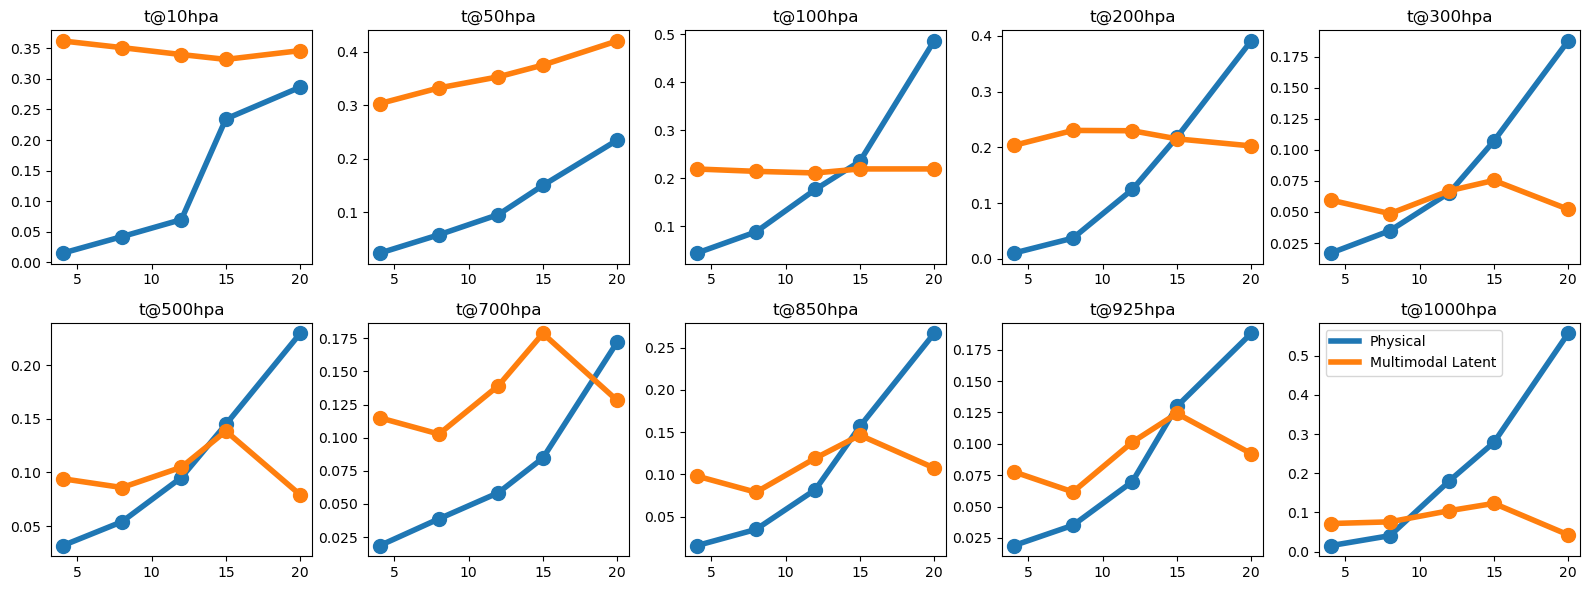

In [4]:
## CONCLUSION: Even in multimodal case, diffusion in the latent space is more stable than in the physical space

model_names = ['sda_0', 'lsda_1']
model_labels = ['Physical', 'Multimodal Latent']
params = [10, 50, 100, 200, 300, 500, 700, 850, 925, 1000]
coarsening_factors = [4, 8, 12, 15, 20]
n_params = 10
sigma = 0.1

f, ax = plt.subplots(2, 5, figsize=(16, 6)) 

for param_idx in range(n_params):
    row = param_idx // 5 
    col = param_idx % 5  
    for model_idx, model_name in enumerate(model_names):
        df = pd.read_csv(f'docs/{model_name}/wasserstein_sigma={sigma}.csv')
        line, = ax[row, col].plot(coarsening_factors, df.iloc[param_idx].values, label=f'{model_labels[model_idx]}', linewidth=4)
        ax[row, col].plot(coarsening_factors, df.iloc[param_idx].values, 'o', markersize=10, color=line.get_color()) 
    
    ax[row, col].set_title(f't@{params[param_idx]}hpa')

plt.tight_layout()
plt.legend()
plt.show()

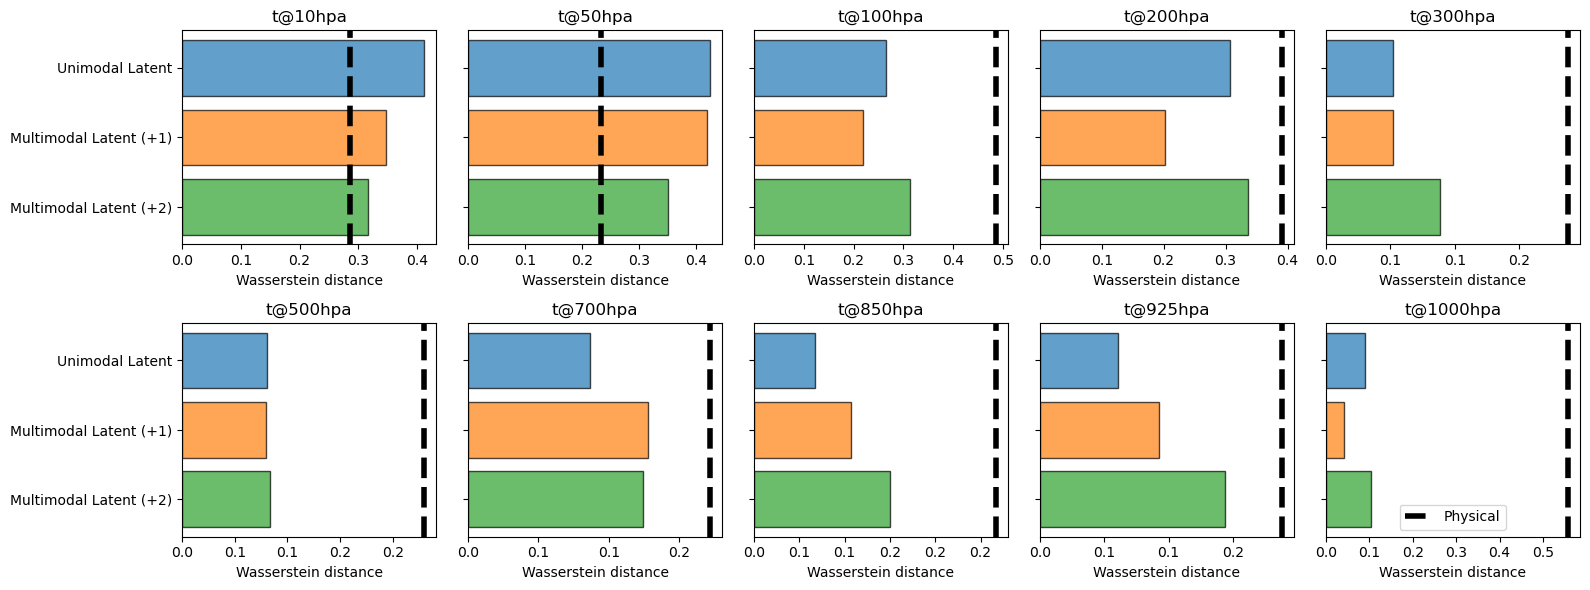

In [5]:
## CONCLUSION: Further emphasizing the stability of various cases of  
## modality in the latent space: diffusion in the latent space is more stable than in the physical space

model_names = ['sda_0', 'lsda_0', 'lsda_1', 'lsda_2']
model_labels = ['Physical', 'Unimodal Latent', 'Multimodal Latent (+1)', 'Multimodal Latent (+2)'] 
params = [10, 50, 100, 200, 300, 500, 700, 850, 925, 1000]
sigma = 0.1

# Adjust subplot layout to 2 rows and 5 columns
f, ax = plt.subplots(2, 5, figsize=(16, 6), sharey=True)

for param_idx, param in enumerate(params):
    row = param_idx // 5  # Determine row for the subplot
    col = param_idx % 5   # Determine column for the subplot
    
    # Plot the value for the Physical model as a vertical line
    df_physical = pd.read_csv(f'docs/sda_0/wasserstein_sigma={sigma}.csv')
    ax[row, col].axvline(df_physical.iloc[param_idx, -1], color='black', linestyle='--', linewidth=4, label='Physical')

    # Plot bars for the other models in the specified order
    for model_idx, model_name in enumerate(model_names[1:]):  # Skip 'sda_0' (Physical) for bar plotting
        df = pd.read_csv(f'docs/{model_name}/wasserstein_sigma={sigma}.csv')
        bar_position = 2 - model_idx  # Reverse the order for bar plotting
        ax[row, col].barh(bar_position, df.iloc[param_idx, -1], edgecolor='black', alpha=0.7)

    # Configure subplot aesthetics
    ax[row, col].set_title(f't@{param}hpa')
    ax[row, col].set_xlabel('Wasserstein distance')
    ax[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

# Post-processing to set y-ticks and labels correctly
model_bar_labels = model_labels[1:] 
ax[0, 0].set_yticks(range(len(model_labels[1:])))
ax[0, 0].set_yticklabels(model_bar_labels[::-1])

plt.tight_layout()
plt.legend()
plt.show()


### Ablation 2: Varying noise level in observation

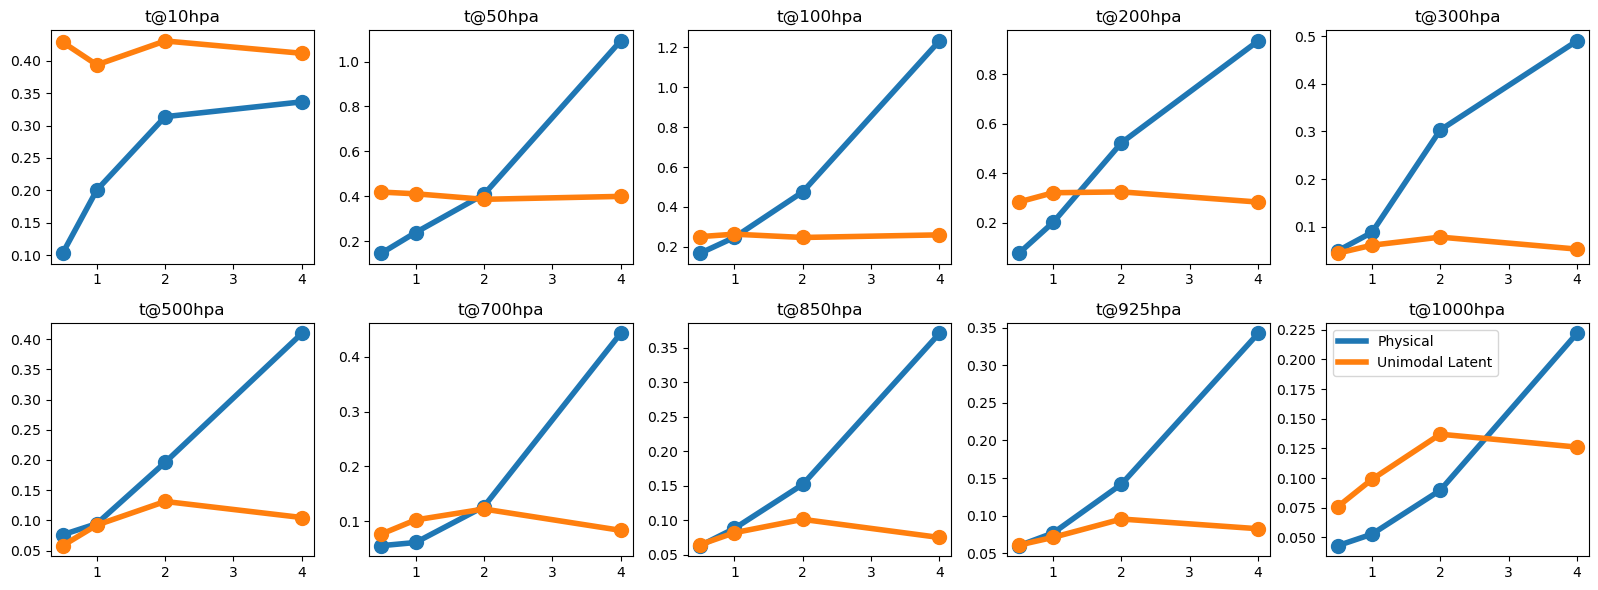

In [6]:
## CONCLUSION: Diffusion in the latent space tends to be more stable than that in the physical space 
## with more perturbation in the observation domain (i.e., increasing noisiness)

model_names = ['sda_0', 'lsda_0']
model_labels = ['Physical', 'Unimodal Latent']
params = [10, 50, 100, 200, 300, 500, 700, 850, 925, 1000]
sigma_sqs = [0.5, 1.0, 2.0, 4.0]
n_params = 10

f, ax = plt.subplots(2, 5, figsize=(16, 6)) 

for param_idx in range(n_params):
    row = param_idx // 5 
    col = param_idx % 5  
    for model_idx, model_name in enumerate(model_names):
        df = pd.read_csv(f'docs/{model_name}/wasserstein_sigma={sigma_sqs[-1]}.csv')
        line, = ax[row, col].plot(sigma_sqs, df.iloc[param_idx].values, label=f'{model_labels[model_idx]}', linewidth=4)
        ax[row, col].plot(sigma_sqs, df.iloc[param_idx].values, 'o', markersize=10, color=line.get_color()) 
    
    ax[row, col].set_title(f't@{params[param_idx]}hpa')

plt.tight_layout()
plt.legend()
plt.show()

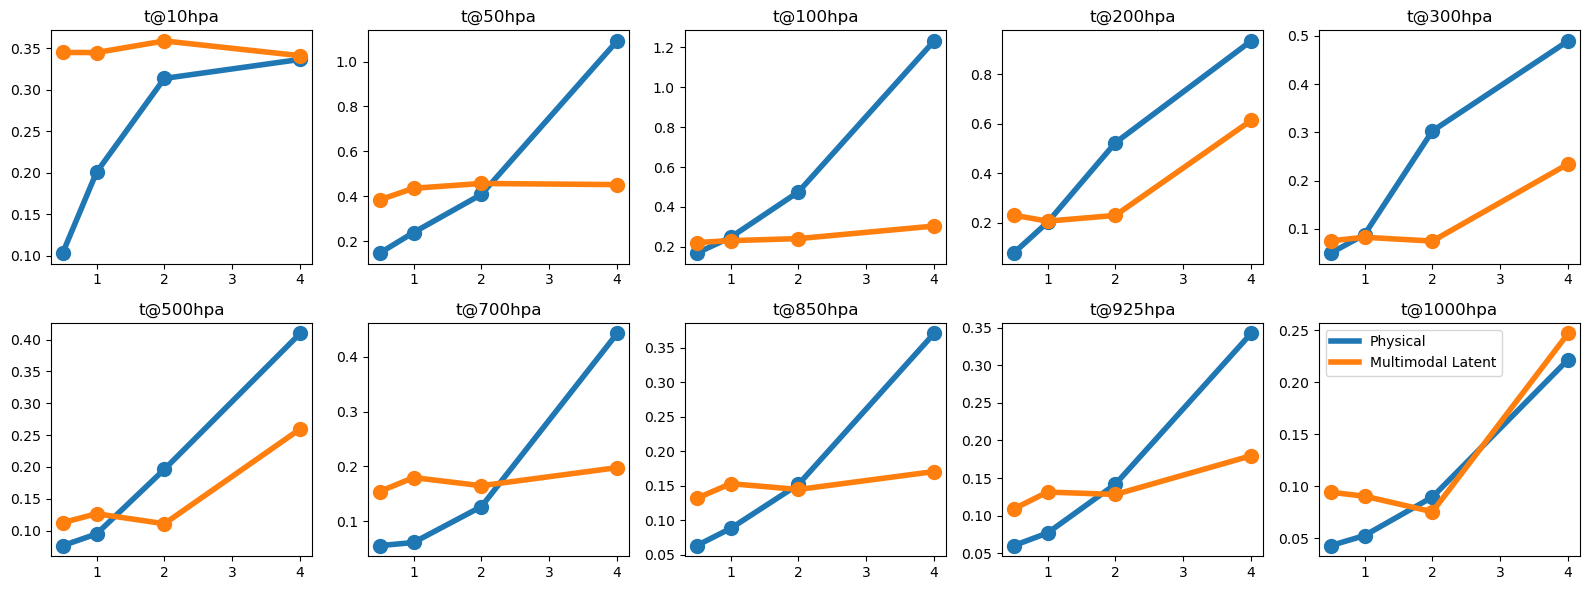

In [7]:
## CONCLUSION: Even in multimodal case, diffusion in the latent space is more stable than in the physical space

model_names = ['sda_0', 'lsda_1']
model_labels = ['Physical', 'Multimodal Latent']
params = [10, 50, 100, 200, 300, 500, 700, 850, 925, 1000]
sigma_sqs = [0.5, 1.0, 2.0, 4.0]
n_params = 10

f, ax = plt.subplots(2, 5, figsize=(16, 6)) 

for param_idx in range(n_params):
    row = param_idx // 5 
    col = param_idx % 5  
    for model_idx, model_name in enumerate(model_names):
        df = pd.read_csv(f'docs/{model_name}/wasserstein_sigma={sigma_sqs[-1]}.csv')
        line, = ax[row, col].plot(sigma_sqs, df.iloc[param_idx].values, label=f'{model_labels[model_idx]}', linewidth=4)
        ax[row, col].plot(sigma_sqs, df.iloc[param_idx].values, 'o', markersize=10, color=line.get_color()) 
    
    ax[row, col].set_title(f't@{params[param_idx]}hpa')

plt.tight_layout()
plt.legend()
plt.show()

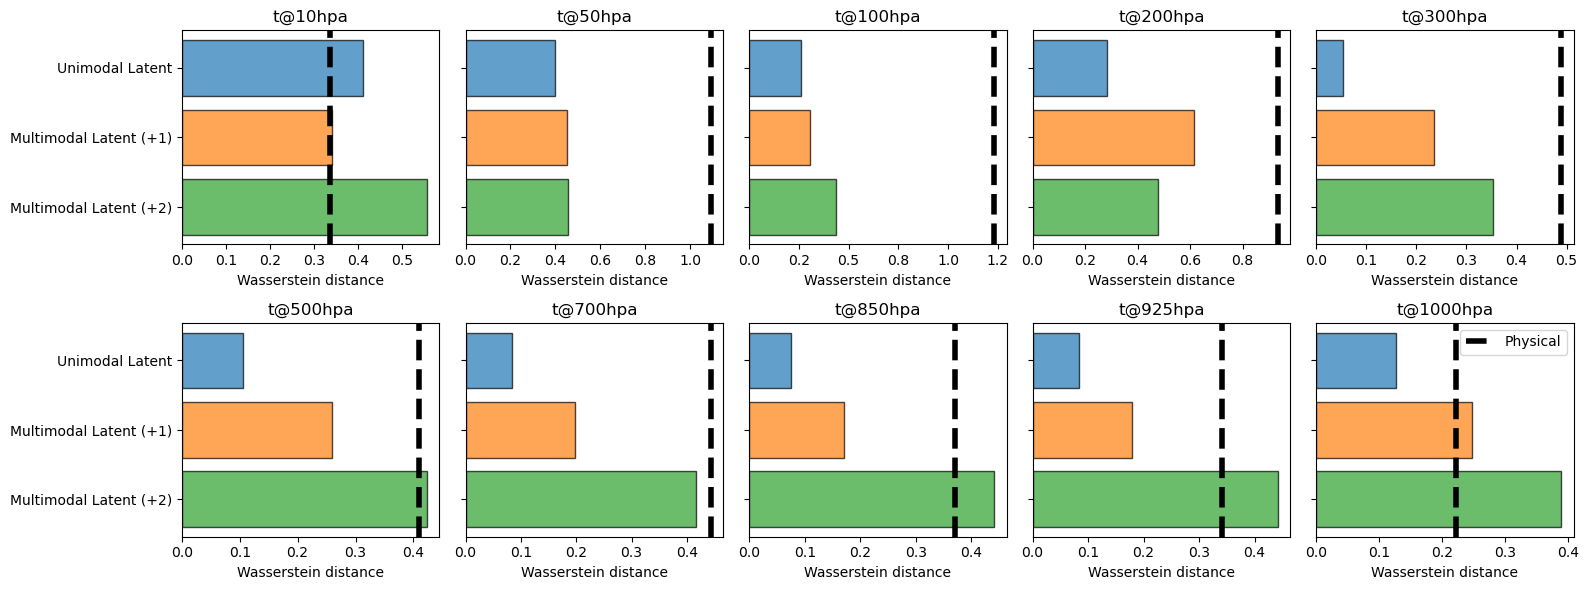

In [8]:
## CONCLUSION: Further emphasizing the stability of various cases of  
## modality in the latent space: diffusion in the latent space is more stable than in the physical space

model_names = ['sda_0', 'lsda_0', 'lsda_1', 'lsda_2']
model_labels = ['Physical', 'Unimodal Latent', 'Multimodal Latent (+1)', 'Multimodal Latent (+2)'] 
params = [10, 50, 100, 200, 300, 500, 700, 850, 925, 1000]
sigma_sqs = [0.5, 1.0, 2.0, 4.0]

# Adjust subplot layout to 2 rows and 5 columns
f, ax = plt.subplots(2, 5, figsize=(16, 6), sharey=True)

for param_idx, param in enumerate(params):
    row = param_idx // 5  # Determine row for the subplot
    col = param_idx % 5   # Determine column for the subplot
    
    # Plot the value for the Physical model as a vertical line
    df_physical = pd.read_csv(f'docs/sda_0/wasserstein_sigma={sigma_sqs[-1]}.csv')
    ax[row, col].axvline(df_physical.iloc[param_idx, -1], color='black', linestyle='--', linewidth=4, label='Physical')

    # Plot bars for the other models in the specified order
    for model_idx, model_name in enumerate(model_names[1:]):  # Skip 'sda_0' (Physical) for bar plotting
        df = pd.read_csv(f'docs/{model_name}/wasserstein_sigma={sigma_sqs[-1]}.csv')
        bar_position = 2 - model_idx  # Reverse the order for bar plotting
        ax[row, col].barh(bar_position, df.iloc[param_idx, -1], edgecolor='black', alpha=0.7)

    # Configure subplot aesthetics
    ax[row, col].set_title(f't@{param}hpa')
    ax[row, col].set_xlabel('Wasserstein distance')
    ax[row, col].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

# Post-processing to set y-ticks and labels correctly
model_bar_labels = model_labels[1:] 
ax[0, 0].set_yticks(range(len(model_labels[1:])))
ax[0, 0].set_yticklabels(model_bar_labels[::-1])

plt.tight_layout()
plt.legend()
plt.show()
